## Introduction
In this notebook ,we're going to thorigh an example machine learning project with the goal of helping a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

**Customer personality analysis** helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## 1.Problem Definition
How well can we create customer segments that determines which products get recommended to them given their specific details captured by the business e.g Customer's birth year,Customer's education level ,customer's marital status,Customer's yearly household income e.t.c

## 2. Data
The dataset for this project was downloaded from the Kaggle **__[Customer personality analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?select=marketing_campaign.csv)__**

Our dataset contains the following customer features:
1. People
2. Products
3. Promotion
4. Place


## 3. Evaluation
Perform clustering to summarize customer segments.

## 4. Data Dictionary

Kaggle provides a data dictionary detailing all of the features of the datas.
#### People
1. ID: Customer's unique identifier
2. Year_Birth: Customer's birth year
3. Education: Customer's education level
4. Marital_Status: Customer's marital status
5. Income: Customer's yearly household income
6. Kidhome: Number of children in customer's household
7. Teenhome: Number of teenagers in customer's household
8. Dt_Customer: Date of customer's enrollment with the company
9. Recency: Number of days since customer's last purchase
10. Complain: 1 if the customer complained in the last 2 years, 0 otherwise
#### Products
1. MntWines: Amount spent on wine in last 2 years
2. MntFruits: Amount spent on fruits in last 2 years
3. MntMeatProducts: Amount spent on meat in last 2 years
4. MntFishProducts: Amount spent on fish in last 2 years
5. MntSweetProducts: Amount spent on sweets in last 2 years
6. MntGoldProds: Amount spent on gold in last 2 years
#### Promotion
1. NumDealsPurchases: Number of purchases made with a discount
2. AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
3. AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
4. AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
5. AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
6. AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
7. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
#### Place
1. NumWebPurchases: Number of purchases made through the company’s website
2. NumCatalogPurchases: Number of purchases made using a catalogue
3. NumStorePurchases: Number of purchases made directly in stores
4. NumWebVisitsMonth: Number of visits to company’s website in the last month.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

####  Load Dataset

In [2]:
#load our dataset and add delimiter to separate it 
customer_data=pd.read_csv("marketing_campaign.csv",sep="\t",low_memory=False)
#View a summary of our dataset
customer_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
customer_data.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [4]:
#Check information about our data
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### Check for Missing Values

In [5]:
#Check for missing values in %
customer_data.isna().sum() / len(customer_data) * 100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [6]:
#Obtaining the shape of our dataset
customer_data.shape

(2240, 29)

* Original customer dataset is separated by delimiter **"\t"** in given data set.
* Our dataset comprises of 2240 observations and 29 features or can be stated as 2240 rows and 29 columns.
* From our dataset we have missing values only in the income column. Representing a 1.1% of all the captured income.
* Customer's enrollment date column has an incorrect data type it's supposed to be date time.We shall need to convert it.
* We can handle the  missing values using imputation method by replacing them with the mean income from the customers         captured.

#### Handling Missing Values

In [7]:
#Handling missing values
customer_data["Income"] = customer_data["Income"].fillna(customer_data['Income'].median())

#### Data Cleaning

In [8]:
#Change Customer's enrollment date  to the correct data type which is date
customer_data['Dt_Customer']=pd.to_datetime(customer_data['Dt_Customer'],format='%d-%m-%Y')

In [9]:
customer_data.dtypes.value_counts()

int64             25
object             2
float64            1
datetime64[ns]     1
dtype: int64

In [10]:
#Check for duplicate values based on customer's unique ID
customer_data['ID'].nunique()

#We can drop the ID column
customer_data.drop('ID',axis=1,inplace=True)

In [11]:
#Customer's Education and Marital Status categories
print('Customers Education Categories: \n',customer_data['Education'].value_counts())
print('\n Customers Marital Status Categories: \n',customer_data['Marital_Status'].value_counts())

Customers Education Categories: 
 Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

 Customers Marital Status Categories: 
 Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


In [12]:
#Given the various marital statuses we can work with the following (Single,Married,Divorsed,Widow) as recognised widely.
customer_data['Marital_Status']=customer_data['Marital_Status'].replace({'Together':'Married','Alone':'Single','Alone':'Single','Absurd':'Single','YOLO':'Single'})
#Replace 2n Cycle column with Master
customer_data['Education']=customer_data['Education'].replace({'2n Cycle':'Master'})
#Drop columns
customer_data.drop(['Z_CostContact','Z_Revenue'],axis=1,inplace=True)

* There no duplicates in our dataset.
* We can drop the ID column as it no correlation to any feature in the dataset as it's randomly generated by the system.
* Our dataset comprises of integer(25),float(1),object(2) and datetime(1) datatypes. The majority being integer data type.
* We can remove the following columns(Z_CostContact and Z_Revenue) as we don't have information about them even from our     data dictionary.
* Looking at the marital status column we shall need to reduce the categories to the widely know statuses as                 (Single,Married,Divorced,Widow).
* When we look at the education level types the 2n cycle is similar to Masters hence we need to remove this column.
* There are categorical values that we shall need to encode later after we perform feature enginearing and EDA first we look at them.

Image Source: click [here](https://www.studera.nu/startpage/higher-education-studies/higher-education-in-sweden/study-levels-and-degrees/#:~:text=First%20cycle%20is%20for%20the,doctoral%20or%20PhD%20level%20studies.) for the image source.
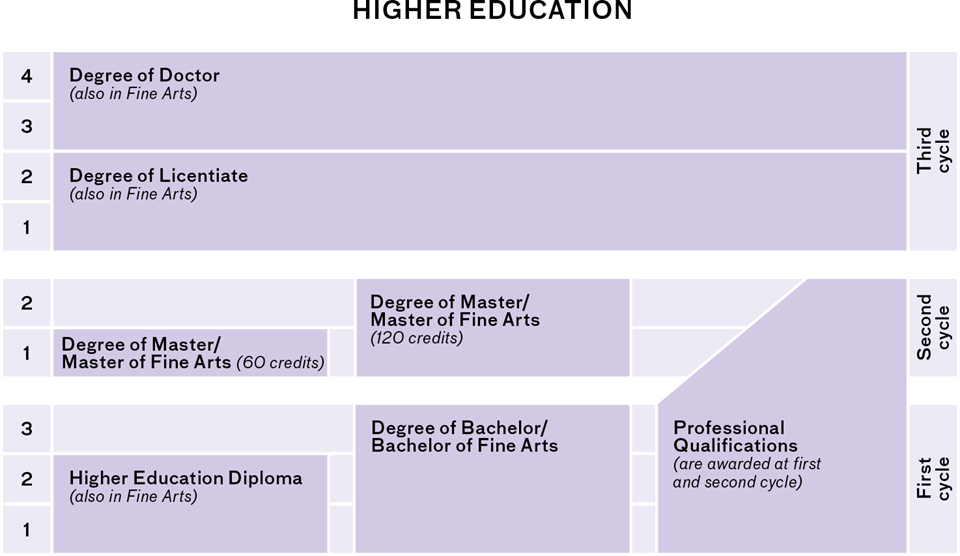

## 5.Feature Engineering

* Given the customer's birth year we shall calculate their **age** as per 2014 when their details were being captured.
* Add a dollar sign to income column for clarity purposes.
* Given there are customers who are parents to kids and teens  we can create a column for **family size** and also **number of children**
* The Education level we can create another column named **post_graduate** to capture those with (Master + PhD) as 1 and 0 for undergraduate + Basic.
* Given  there are customers who are not parents despite their maritat status not being Single we can create a column for     **Parent**
* Given the various amounts spent on particular product categories  by a customer we can create a column for **Customer       total Purchase**.

In [13]:
#Calculate Customer Age using 2014 as the current year
customer_data['Customer_Age']=2014-customer_data['Year_Birth']
#Rename Income column add a dollar sign
customer_data.rename(columns={'Income':'Income($)'},inplace=True)
#Create column to handle post graduate details
customer_data['Postgraduate']=customer_data['Education'].replace({'PhD':1,'Master':1,'Graduation':0,'Basic':0})
customer_data['Postgraduate']=customer_data['Postgraduate'].astype(int)
#Calculate customer's number of children
customer_data['no_of_children']=customer_data['Kidhome']+customer_data['Teenhome']
#Obtain infomation if the  customer is a parent(1-is a parent,0 is not a parent)
customer_data['Parent']=customer_data['no_of_children'].replace({1:1,0:0,2:1,3:1})
#Calculate the family Size
customer_data['family_size']=customer_data['Marital_Status'].replace({'Single':1,'Married':2,'Divorced':1,'Widow':1})+customer_data['no_of_children']
#Calculate the total Customer Purchase based on amount spent on listed products
customer_data['custm_tot_purchase($)']=customer_data['MntWines']+customer_data['MntFruits']+customer_data['MntMeatProducts']+customer_data['MntFishProducts']+customer_data['MntSweetProducts']+customer_data['MntGoldProds']
customer_data.drop(['Year_Birth'],axis=1,inplace=True)

In [14]:
customer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Income($),2240.0,52237.975446,25037.955891,1730.0,35538.75,51381.5,68289.75,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0
MntGoldProds,2240.0,44.021875,52.167439,0.0,9.00,24.0,56.00,362.0


* Worth noting is the  large difference between 75th percentile and max values of these columns **MntWines,MntFruits, MntMeatProducts,MntSweetProducts,MntGoldProds,Customer_Age.**

* This is an indication of outlier values in these columns which we will need to drop them.

#### Checking for outliers
* These are the extreme values within the dataset. That means the outlier data points vary greatly from the expected values   either being much larger or significantly smaller. 
* We shall use box plots to findout the outliers later we shall drop them at the mark showb by showfliers = False.

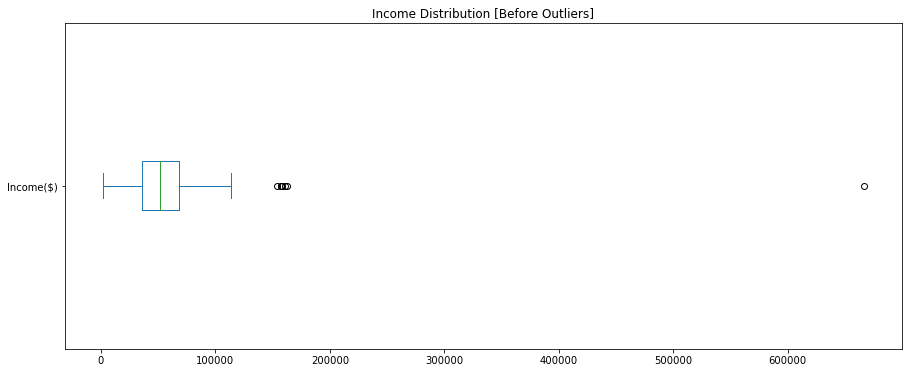

In [15]:
fig, ax = plt.subplots(figsize = [15, 6])
customer_data["Income($)"].plot(kind = "box", vert = False)
plt.title("Income Distribution [Before Outliers]");

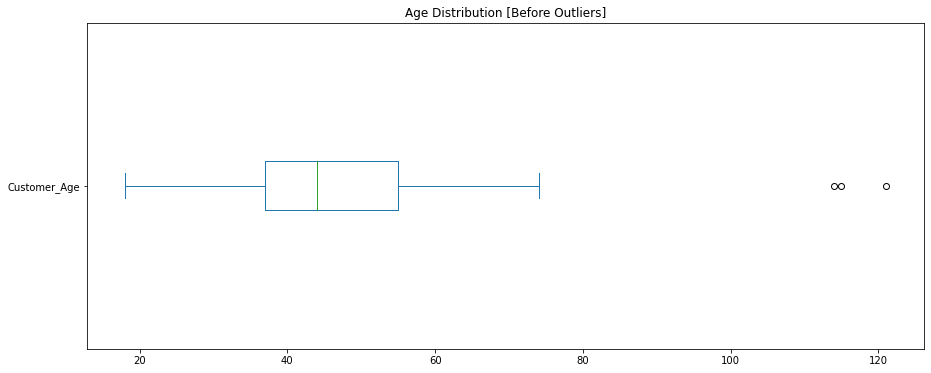

In [16]:
fig, ax = plt.subplots(figsize = [15, 6])
customer_data["Customer_Age"].plot(kind = "box", vert = False)
plt.title("Age Distribution [Before Outliers]");

In [17]:
#Remove outliers in Age and Income
mask_income = customer_data["Income($)"].between(12500,110000)
mask_age = customer_data["Customer_Age"] <= 75
customer_data = customer_data[mask_income & mask_age]

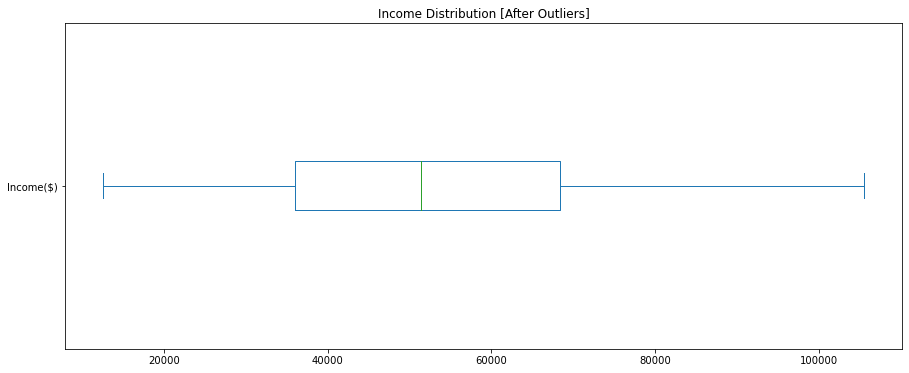

In [18]:
fig, ax = plt.subplots(figsize = [15, 6])
customer_data["Income($)"].plot(kind = "box", vert = False)
plt.title("Income Distribution [After Outliers]");

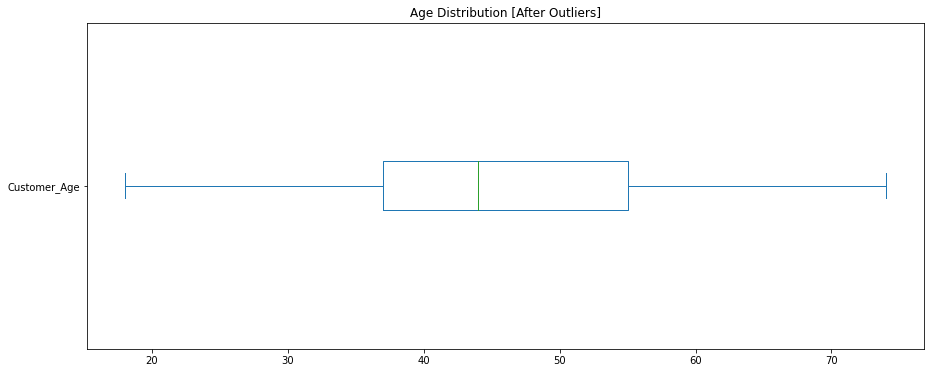

In [19]:
fig, ax = plt.subplots(figsize = [15, 6])
customer_data["Customer_Age"].plot(kind = "box", vert = False)
plt.title("Age Distribution [After Outliers]");

In [20]:
customer_data["Customer_Age"].describe()

count    2192.000000
mean       45.234945
std        11.665778
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max        74.000000
Name: Customer_Age, dtype: float64

In [21]:
(customer_data["Customer_Age"] <= 75).value_counts()

True    2192
Name: Customer_Age, dtype: int64

In [22]:
customer_data[customer_data["Customer_Age"] <= 80]["Customer_Age"].describe()
#plot(kind = "box", vert = False);

count    2192.000000
mean       45.234945
std        11.665778
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max        74.000000
Name: Customer_Age, dtype: float64

In [23]:
#Singling out the columns that have the outliers. 
customer_purchase=customer_data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                                 'MntGoldProds','Customer_Age','Parent']]

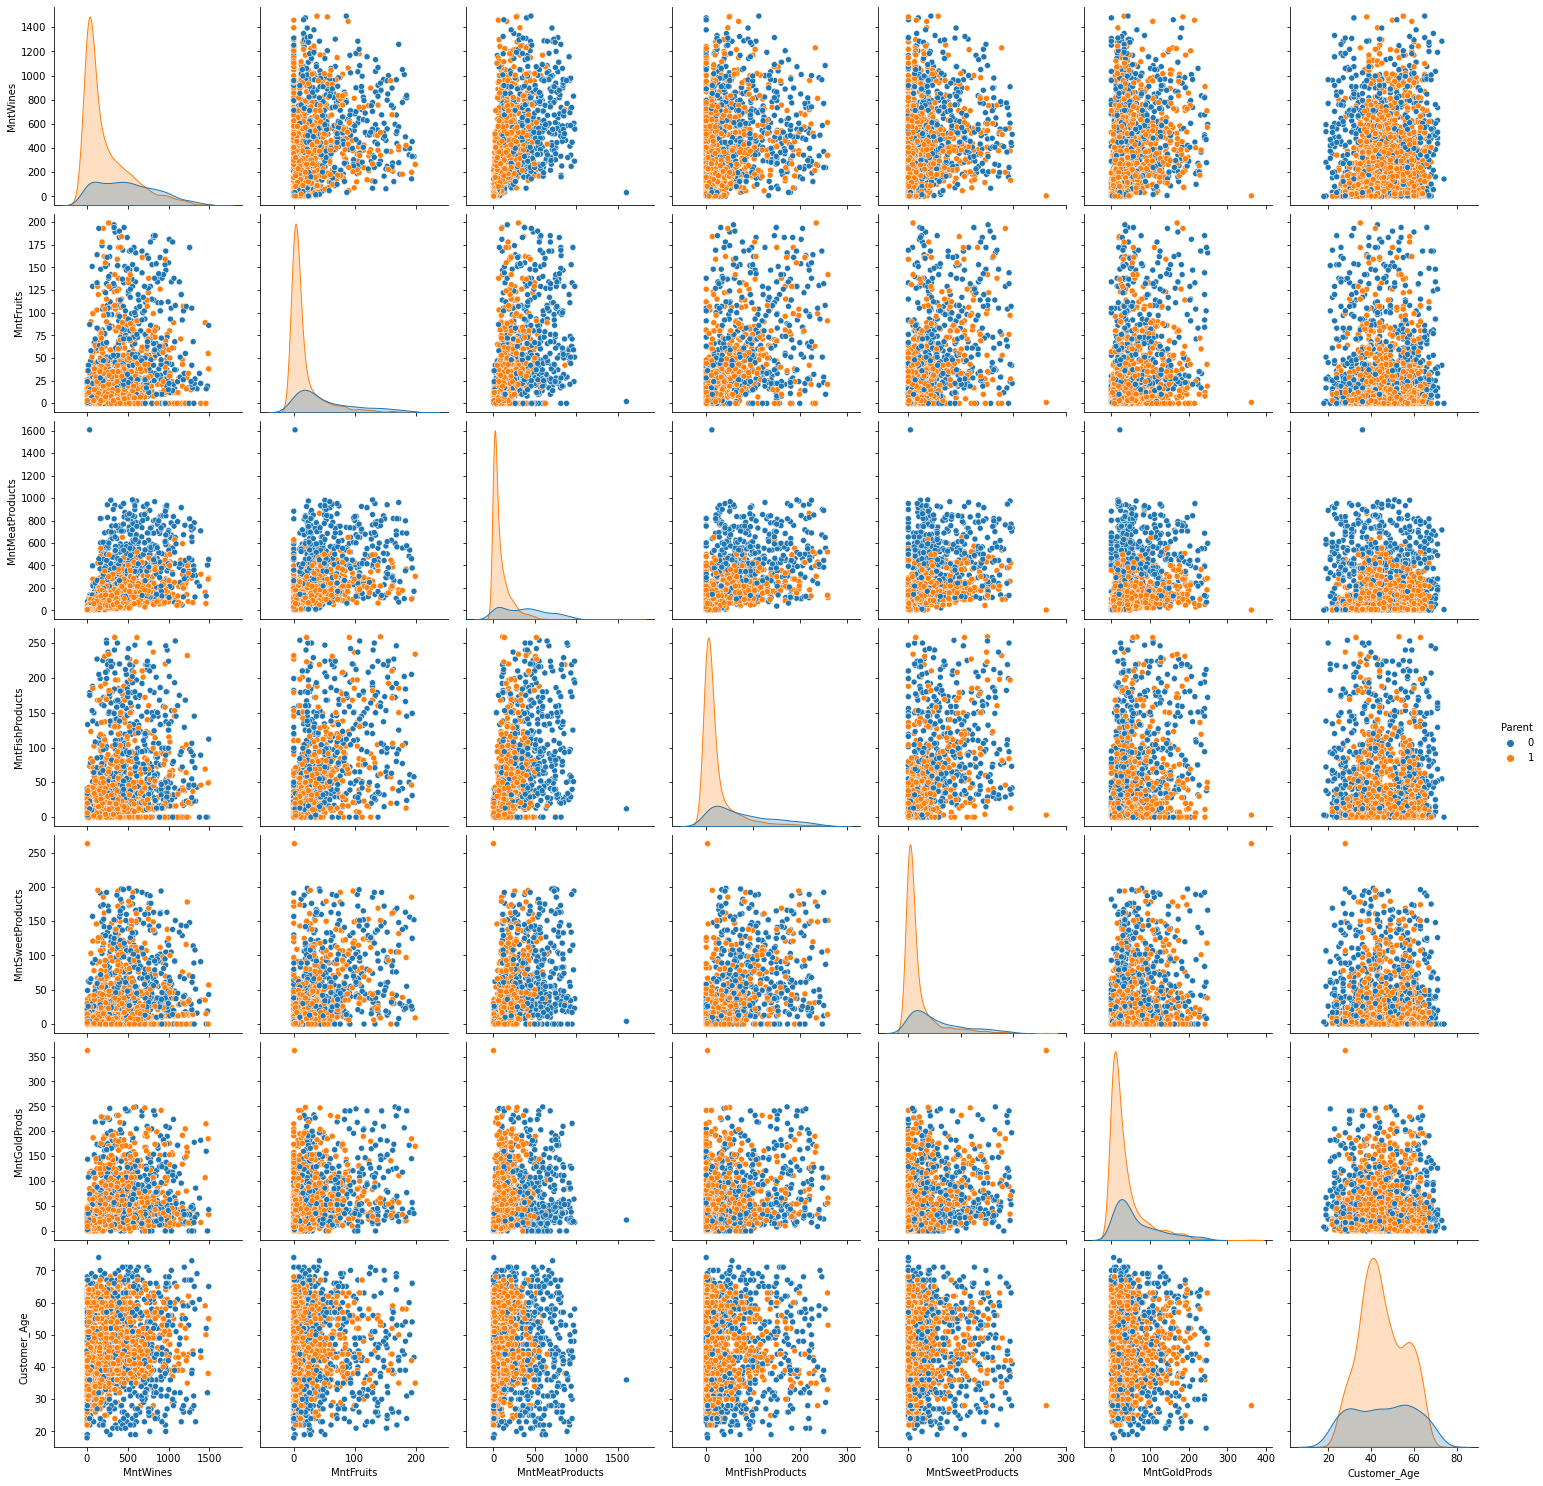

In [24]:
#Plotting customer purchases based on the columns that have outliers and using hue as Parent.
sns.pairplot(data=customer_purchase,hue='Parent',height=3)

In [33]:
#Getting the statistical representation following dropping of outliers
customer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Income($),2192.0,52313.816150,19935.426539,12571.0,36058.25,51400.5,68363.25,105471.0
Kidhome,2192.0,0.442974,0.539144,0.0,0.00,0.0,1.00,2.0
Teenhome,2192.0,0.511405,0.544553,0.0,0.00,0.0,1.00,2.0
Recency,2192.0,49.193431,28.930345,0.0,24.00,50.0,74.00,99.0
MntWines,2192.0,309.896442,337.436448,0.0,26.00,183.5,509.00,1493.0
MntFruits,2192.0,26.684763,39.997382,0.0,2.00,8.0,34.00,199.0
MntMeatProducts,2192.0,167.099909,217.751892,1.0,16.00,69.0,237.25,1607.0
MntFishProducts,2192.0,38.187044,54.995404,0.0,3.00,12.0,51.00,259.0
MntSweetProducts,2192.0,27.417427,41.278468,0.0,1.00,9.0,35.00,263.0
MntGoldProds,2192.0,44.237682,51.556429,0.0,9.00,25.0,57.00,362.0


## 6.Exploratory Data Analysis

#### Comparing Earning between a Parent and a non Parent in relation to their Education Levels

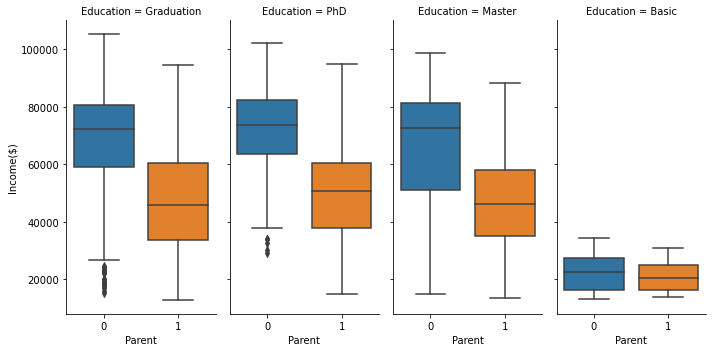

In [34]:
sns.catplot(x='Parent',y='Income($)',col='Education',kind='box',data=customer_data,aspect=0.5);

* Looking at the the customer's income who are parents those who are parents and have a degree(graduated) or a PhD have a     slight difference of income as compared to non parents with the same education level.

* Customers who are not parents and their education level being Master earn more than those who are paents.

* Customers who are parents and have a basic education level earn more with a big difference than those who are not compared to other education levels.

#### Customer Purchases between a Parent and a non-parent in relation to their education levels.

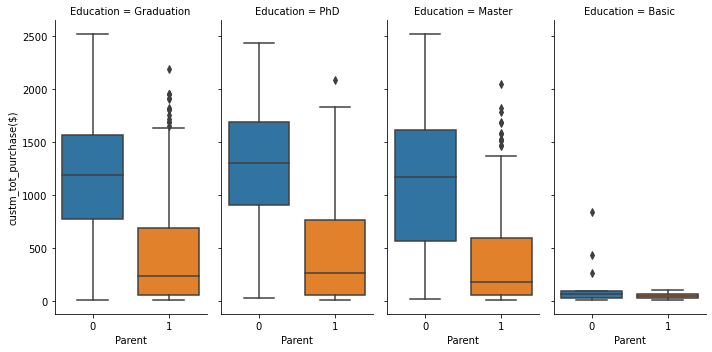

In [35]:
sns.catplot(x='Parent',y='custm_tot_purchase($)',col='Education',kind='box',data=customer_data,aspect=0.5);

In [44]:
#Create a pivot table of Education in relation to Income, Total purchase and Customer's age
educ_pivot = pd.pivot_table(
    customer_data, index = "Education", values = ['Income($)','custm_tot_purchase($)','Customer_Age'], aggfunc = np.median
)
educ_pivot["Education"] = ["Basic", "Graduation", "Master", "PhD"]
educ_pivot = educ_pivot.reset_index(drop=True)
educ_pivot

,Customer_Age,Income($),custm_tot_purchase($),Education
0,35.0,22390.0,54.0,Basic
1,44.0,52074.0,433.0,Graduation
2,44.0,50343.5,338.0,Master
3,46.5,54978.5,495.5,PhD


In [46]:
# Rescale the pivot table
# Get a scaler object
scaler = MinMaxScaler()

# Create a new dataframe for the scaled values
educ_normalized = educ_pivot[['Education', 'Income($)', 'custm_tot_purchase($)','Customer_Age']].copy()

# Normalize the numeric columns
educ_normalized[['Income($)', 'custm_tot_purchase($)','Customer_Age']] = scaler.fit_transform(educ_normalized[['Income($)', 'custm_tot_purchase($)','Customer_Age']])

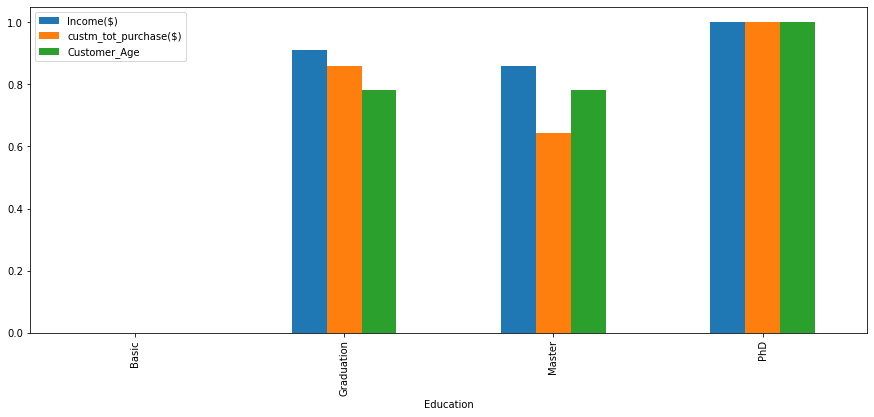

In [51]:
# Plot the normalized values
fig, ax = plt.subplots(figsize = [15, 6])
educ_normalized.plot(x='Education', y=['Income($)','custm_tot_purchase($)','Customer_Age'], kind='bar', ax = ax);

* Customers with basic education have the least income, the least purchase and are younger that other customers
* PhD customers have the highest income, highest purchase and are the oldest
* Graduate customers have relatively higher income and total number of purchase than Master customers.

#### Size of the family in relation to Income and Education Levels.

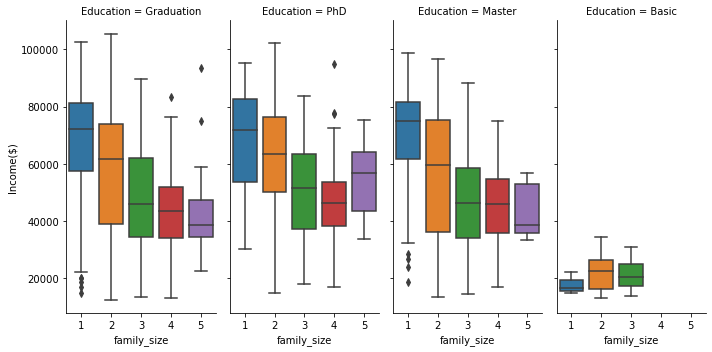

In [40]:
sns.catplot(x='family_size',y='Income($)',col='Education',kind='box',data=customer_data,aspect=0.5)

#### Customer's Enrollment

In [41]:
print('The recent customer enrollment date:',max(customer_data['Dt_Customer']))
print('The oldest customer enrollment date:',min(customer_data['Dt_Customer']))

The recent customer enrollment date: 2014-06-29 00:00:00
The oldest customer enrollment date: 2012-07-30 00:00:00


* The earliest customer enrollment was on 30th July 2012 with the recent being 29th June 2014. The dataset captures customer's purchases for two years. Hence the Age we have calculated based on the recent date of enrollment.

In [42]:
customer_data.corr()

,Income($),Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Age,Postgraduate,no_of_children,Parent,family_size,custm_tot_purchase($)
Income($),1.000000,-0.545007,0.030643,0.003597,0.733222,0.541797,0.718365,0.554258,0.550828,0.435036,...,0.348265,0.110764,-0.031976,0.176478,0.194869,0.055068,-0.367896,-0.429039,-0.316952,0.832812
Kidhome,-0.545007,1.000000,-0.033539,0.008403,-0.502134,-0.375997,-0.454999,-0.391133,-0.374570,-0.353730,...,-0.173505,-0.082238,0.036856,-0.081845,-0.236796,-0.015319,0.691428,0.516691,0.587050,-0.562947
Teenhome,0.030643,-0.033539,1.000000,0.013824,-0.003000,-0.182027,-0.275574,-0.211849,-0.167450,-0.032911,...,-0.144229,-0.016892,0.006803,-0.157444,0.359420,0.057420,0.698849,0.590584,0.594899,-0.147165
Recency,0.003597,0.008403,0.013824,1.000000,0.014127,-0.004758,0.025866,-0.000111,0.025986,0.021408,...,-0.020300,-0.002145,0.005164,-0.198893,0.018970,-0.032955,0.016007,-0.002621,0.011078,0.020572
MntWines,0.733222,-0.502134,-0.003000,0.014127,1.000000,0.383687,0.591986,0.393106,0.385823,0.391816,...,0.352685,0.205582,-0.037887,0.246665,0.156106,0.103748,-0.361532,-0.352510,-0.306011,0.896417
MntFruits,0.541797,-0.375997,-0.182027,-0.004758,0.383687,1.000000,0.569261,0.592134,0.570484,0.395715,...,0.193378,-0.010953,-0.003803,0.124020,0.009727,-0.096420,-0.400669,-0.419973,-0.347668,0.614755
MntMeatProducts,0.718365,-0.454999,-0.275574,0.025866,0.591986,0.569261,1.000000,0.596192,0.556292,0.379671,...,0.324649,0.045019,-0.021775,0.251440,0.035259,-0.024004,-0.524829,-0.604021,-0.454370,0.856815
MntFishProducts,0.554258,-0.391133,-0.211849,-0.000111,0.393106,0.592134,0.596192,1.000000,0.582884,0.428967,...,0.258853,0.001170,-0.020048,0.109171,0.036875,-0.086552,-0.433059,-0.459104,-0.370616,0.643647
MntSweetProducts,0.550828,-0.374570,-0.167450,0.025986,0.385823,0.570484,0.556292,0.582884,1.000000,0.379624,...,0.242371,0.009084,-0.021432,0.116821,0.008767,-0.091957,-0.389111,-0.403358,-0.333230,0.609951
MntGoldProds,0.435036,-0.353730,-0.032911,0.021408,0.391816,0.395715,0.379671,0.428967,0.379624,1.000000,...,0.169220,0.050648,-0.030974,0.142290,0.055840,-0.118625,-0.276944,-0.252543,-0.246056,0.534313


<AxesSubplot:>

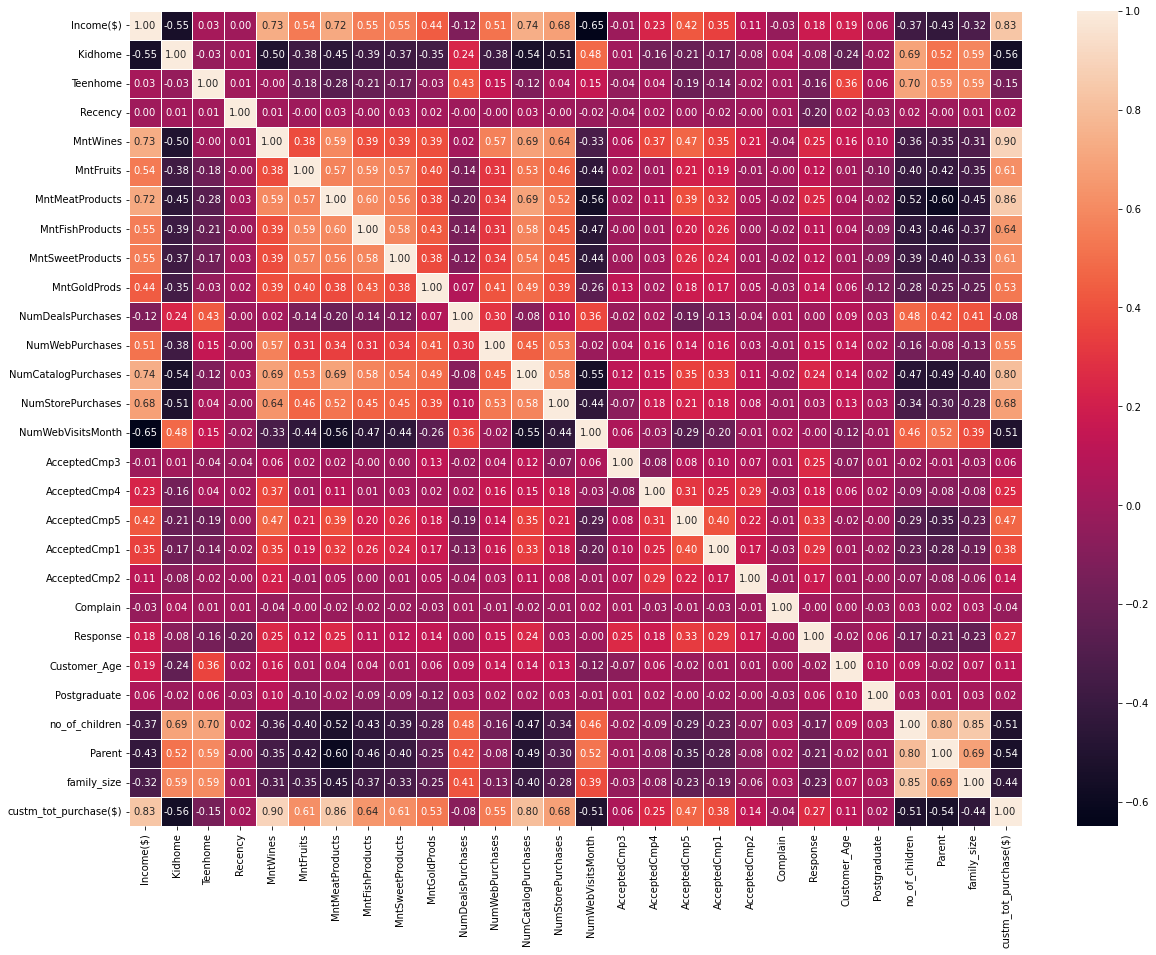

In [43]:
plt.figure(figsize=(20,15))
sns.heatmap(data=customer_data.corr(),linewidth=.5,annot=True,fmt='.2f')

* We can see from the correlation heat map the values that have a strong positive correlation above 0.5 to 1.0 and strong      negative strong correlation aboves -0.50 to -6.0
* There is a  positive correlation between the Kids at home and the number of web visits per month as well as the number of   deals purchased.
* When it comes to teens at home there is a positive correlation to the number of store purchases,number of web purchases and number of deals purchases as well on the amount spent on wine.

* With the objective being to increase customer purchases there is a strong positive correlation between the **total customer purchases** and the **customer age,acceptance of the first campaign,number of deals purchases,fifth campaign,forth,campaign,amount of gold products purchased,amount of sweets purchased,amount of fish products purchased,number of web purchases,new store purchases,amount of fruit purchased,number of catalog purchases,amount of meat products purchased and the highest being amount of wine purchased**.

* When it comes to campigns the campign5 has the highest correlation to the amount of wine purchased.
* The amount of meat products have a strong correlation with the customer total purchase
